## SVM

- powerful and versatile machine learning algorithms
- capable of performing linear or non linear classification, regression, and even outlier detection.
- well suited for classification of complex small and medium size dataset 

### Linear SVM Classification

We can use linear SVM when we have two classes that clearly can be separated easily with a straight line (they are linearly separable).

**Large Margin Classification**
- SVM classifies two binary classed with maximum possible distance  
- Dependent on the instance on the edge of the street (called support vectors)
- SVMs are sensitive to the feature scales
- only works if data is linearly separable
- sesnsitive to outliers

**Soft Margin Classification**
- modified version of the hard margin classification, in hard margin classification the data is completely linearly separable, which is not always the case in practical examples due to a few outliers. If we put the separation based on these outliers the final decision boundary maybe very different from desired and the model may not generalize well. Hence we use soft margin classification. 
- objective is to find a good balance between keeping the street as large as possible and limiting the margin violations
- when creating a SVM model, we can specify a number of hyperparamters. C is one of thoe hyperparamters (which defines the balance).  
    - high c - too soft, many boundary violations
    - small c - too hard, strict boundaries
- If our SVM model is overfitting, we can try regularizing it by reducing C.

In [1]:
## Applying SVM on classification problem
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()

In [3]:
## Understanding data
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Data Set has 4 features and 3 target classes

In [7]:
## Assigning X and Y
## Only taking petal features (length and width) and virginica target class
X= iris["data"][:,(2,3)]
y= (iris["target"] == 2).astype(np.float64)

In [8]:
## Creating SVM Pipeline
svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge")),
])

In [9]:
## Fitting the pipeline of models and preprocessing to the feature set 
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [16]:
import joblib
joblib.dump(svm_clf,'models/ch_05/hinge_svm_clf.pkl')

['models/ch_05/hinge_svm_clf.pkl']

In [13]:
## Predictive a random feature
svm_clf.predict([[5.5,1.7]])

array([1.])

In [14]:
## plot x and y and model
y_pred = svm_clf.predict(X)

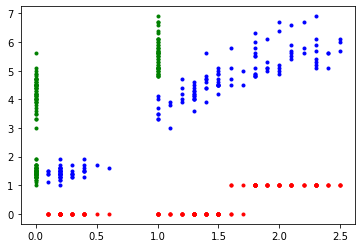

In [15]:
import matplotlib.pyplot as plt

plt.plot(X[:,1],X[:,0],"b.")
plt.plot(X[:,1],y_pred,"r.")
plt.plot(y_pred,X[:,0],"g.")

Using Linear kernal in SVC instead of using Linear SVC

In [17]:
from sklearn.svm import SVC

svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("scv_linear",SVC(C=1,kernel="linear")),
])

svm_clf.fit(X,y)
print(svm_clf.predict([[5.5,1.7]]))

[1.]


In [18]:
joblib.dump(svm_clf,'models/ch_05/linear_svm_clf.pkl')

['models/ch_05/linear_svm_clf.pkl']

Unlike linear regression, SVM has no output of probabilites for each class

##### Using SGDClassifier 

- in loss function the possible options are 
    - ‘hinge’,
    - ‘log’, 
    - ‘modified_huber’, 
    - ‘squared_hinge’, 
    - ‘perceptron’,
    - or a regression loss: 
        - ‘squared_loss’, 
        - ‘huber’, 
        - ‘epsilon_insensitive’, 
        - or ‘squared_epsilon_insensitive’.

The ‘log’ loss gives logistic regression, a probabilistic classifier. ‘modified_huber’ is another smooth loss that brings tolerance to outliers as well as probability estimates. ‘squared_hinge’ is like hinge but is quadratically penalized. ‘perceptron’ is the linear loss used by the perceptron algorithm. The other losses are designed for regression but can be useful in classification as well; see SGDRegressor for a description.

- alpha : 
    - Constant that multiplies the regularization term. 
    - The higher the value, the stronger the regularization. 
    - used in calculation of learning rate
- LR: 
    - ‘constant’: eta = eta0
    - ‘optimal’: 
        - eta = 1.0 / (alpha * (t + t0)) 
        - where t0 is chosen by a heuristic proposed by Leon Bottou.
    - ‘invscaling’: eta = eta0 / pow(t, power_t)
    - ‘adaptive’: eta = eta0,  

In [20]:
from sklearn.linear_model import SGDClassifier

C =1 
m = 1000

sgd_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("sgd_linear",SGDClassifier(loss="hinge",alpha =1/(m*C))),
])

sgd_clf.fit(X,y)
print(sgd_clf.predict([[5.5,1.7]]))

[1.]


In [21]:
joblib.dump(sgd_clf,'models/ch_05/hinge_sgd_clf.pkl')

['models/ch_05/hinge_sgd_clf.pkl']

### Nonlinear SVM Classification 

In practical cases most datasets are not linearly separable. To handle, non linear cases we can add polynomial features. Testing out one such case 

In [22]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [23]:
X,y= make_moons(n_samples = 100, noise = 0.15)

__Understanding the dataset__

In [27]:
X[:5]

array([[ 0.18758623,  0.80416205],
       [ 0.04159605,  1.0883423 ],
       [-0.88695182,  0.20442036],
       [ 1.66692478, -0.42501941],
       [ 1.80075716,  0.57651335]])

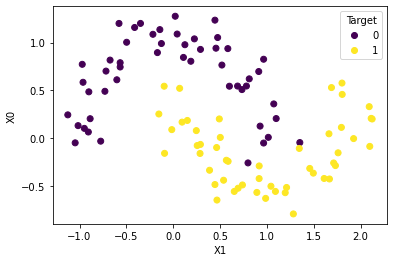

In [46]:
scatter = plt.scatter(X[:,0],X[:,1],c=y, label = y)
plt.xlabel('X1')
plt.ylabel('X0')
plt.legend(handles=scatter.legend_elements()[0],
           labels=[0,1],
           title="Target")

In [28]:
y[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [32]:
set(y) ##Target levels

{0, 1}

Creating a polynomial variable and trianing the linear SVC

In [47]:
svm_clf_poly = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=10,loss="hinge")),
])

In [48]:
svm_clf_poly.fit(X,y)

C:\Users\apurv\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [49]:
joblib.dump(svm_clf_poly,'models/ch_05/poly_svm_clf.pkl')

['models/ch_05/poly_svm_clf.pkl']

### Polynomial Kernel

- adding polynomial variables works well for lower degree of freedom, but it makes the training slow ofr higher degrees. Instead of using the polynormal variables, we can do the __kernel trick__
- the kernel trick makes it possible to get the same result if you had added many polynomial features, even with high degree polynomials, without actually having to add them.

In [50]:
svm_kernel_poly = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=3,coef0=1,C=5)),
])

In [51]:
svm_kernel_poly.fit(X,y) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [52]:
joblib.dump(svm_kernel_poly,'models/ch_05/svm_kernel_poly.pkl')

['models/ch_05/svm_kernel_poly.pkl']

This trains the model exactly same as adding the polynomial feature in the dataset and training. If the model is overfitting, we might reduce the polynomial degree. If the model is underfitting, we can try to increase it. The paramter ```coef0``` controls how the model is influenced by high degree polynomials vs low degree polynomials.

We can use gridsearch to find the correct hyperparamters.

### Similarity Features

- to tackle the non linear problems 
- measures how each features resembles a particular landmark by puting values in the similarty function (eg: gaussian rbf) and comparing to landmark 
- creating landmark
    - transforming each and every instance to a landmark and make it more probable to be a linearly separable dataset
    - downside: 
        - increases the number of features
        - computationally expensive
        
#### Gaussian RBF Kernel

- usign the rbf kernel

In [53]:
rbf_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [54]:
joblib.dump(rbf_kernel_svm_clf,'models/ch_05/rbf_kernel_svm_clf.pkl')

['models/ch_05/rbf_kernel_svm_clf.pkl']

as C or Y increased it starts to overfit 

-------
- Other kernels exist but are used much more rarely. 
- Some kernels are specialized for specific data structures. 
    - String kernels are sometimes used when classifying text documents or DNA sequences (e.g., using the string subsequence kernel or kernels based on the Levenshtein distance).
    
##### How to choose the kernel

- start with linear kernel (if large dataset)
    - SVC linear is fasters than SVC (kernel =linear)
- start with rbf ( medium or small dataset)
- experiment with a few other kernels, using cross-validation and grid search.

#### Computational Complexity

|Class | Time Complexity | Out-of-core support | Scaling required | Kernel trick|
|:-: | :-: | :-: | :-:| :-:|
|SVCLienar | O(m × n) | No | Yes | No
|SVC | between O(m^2 × n) and O(m^3 ×n) | No | Yes | Yes |
| SGDClassifier | O(m × n) | Yes | Yes | No |

### SVM Regression

- SVM algorithm is versatile, it is not only used for linear and nonlinear classification byt also for regression.
- for regression we need to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations
- The width of the street is controlled by a hyperparameter epsilon
- Adding more training instances within the margin does not affect the model’s predictions;thus, the model is said to be ϵ-insensitive.

In [55]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [58]:
joblib.dump(svm_reg,"models/ch_05/svm_reg.pkl")

['models/ch_05/svm_reg.pkl']

To tackle nonlinear regression tasks, you can use a kernelized SVM model.

In [59]:
## Polynomial regression
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [60]:
joblib.dump(svm_poly_reg,"models/ch_05/svm_poly_reg.pkl")

['models/ch_05/svm_poly_reg.pkl']

The SVR class is the regression equivalent of the SVC class, and the LinearSVR class is the regression equivalent of the LinearSVC class. The LinearSVR class scales linearly with the size of the training set (just like the LinearSVC class), while the SVR class gets much too slow when the training set grows large (just like the SVC class). 

SVMs can also be used for outlier detection; see Scikit-Learn’s documentation for more details

----------
### Model Training

#### Decision function and predictions

The linear SVM classifier model predicts the class of a new instance x by simply computing the decision function w x + b = w x + ⋯ + w x + b. If the result is positive, the predicted class ŷ is the positive class (1), and otherwise it is the negative class (0); 
Training a linear SVM classifier means finding the values of w and b that make this margin as wide as possible while avoiding margin violations (hard margin) or limiting them (soft margin).

#### Training Objective

Consider the slope of the decision function: it is equal to the norm of the weight vector, ∥ w ∥. If we divide this slope by 2, the points where the decision function is equal to ±1 are going to be twice as far away from the decision boundary. In other words, dividing the slope by 2 will multiply the margin by 2. The smaller the weight vector w, the larger the margin.

So we want to minimize ∥ w ∥ to get a large margin. If we also want to void any margin violations (hard margin), then we need the decision function to be greater than 1 for all positive training instances and lower than –1 for negative training instances. If we define t=–1 for negative instances (if y = 0) and t = 1 for positive instances (if y = 1), then we can express this constraint as t (w x + b) ≥ 1 for all instances. We can therefore express the hard margin linear SVM classifier objective as the constrained optimization problem. 

For the soft margin optimization, we introduce a slack variable. 


#### Quadratic Programming

Hard and soft margin problems are both convex quadratic optimization problems with linear contraints. One way to train a hard margin linear SVM classifier is to use an off-the-shelf QP solver and pass it the preceding parameters. 


to do>

## Exercises

**1. What is the fundamental idea behind Support Vector Machines?**

To define space for each cateogry based on the parameters, confining them to particular ranges/functions to predict and classify the target classed

**2. What is a support vector?**

Support vectors are the instances on based of which the space is divided  for dataset in order to classify their target class

**3. Why is it important to scale the inputs when using SVMs?**

if not scaled, the SVM may miss out the smaller features 

**4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?**

distance from the boundary can be used as a confidence score (not directly used)
probability, using log regression or predict_proba() function

**5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?**

- primal /dual only in linear svm, dual only in kernal 
- primal complexity prop to m, dual prop to m2 or m3 

**6. Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease γ (gamma)? What about C?**

Y /c increase either/both

**7. How should you set the QP parameters (H, f, A, and b) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?**


https://towardsdatascience.com/support-vector-machine-803884d967e3

**8. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a
SGDClassifier on the same dataset. See if you can get them to produce roughly
the same model.**

In [61]:
## Trying the iris dataset

from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [62]:
y = (iris["target"] == 2).astype(np.int) ##1 is Iris virginics, else 0

In [81]:
X = iris.data[:,3:]

In [82]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [87]:
from sklearn.svm import LinearSVC

lin_svm_ex = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge")),
])

lin_svm_ex.fit(X,y)
print(lin_svm_ex.predict([[1.2],[1.4],[2.3]]))
joblib.dump(lin_svm_ex,'models/ch_05/ex_lin_svm.pkl')

[0 0 1]


['models/ch_05/ex_lin_svm.pkl']

In [89]:
from sklearn.svm import SVC

lin_svc_ex = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",SVC(C=1,kernel="linear")),
])

lin_svc_ex.fit(X,y)
print(lin_svc_ex.predict([[1.2],[1.4],[2.3]]))
joblib.dump(lin_svc_ex,'models/ch_05/ex_lin_svc.pkl')

[0 0 1]


['models/ch_05/ex_lin_svc.pkl']

In [90]:
from sklearn.linear_model import SGDClassifier

m = 1000
C = 1

lin_sgd_ex = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",SGDClassifier(loss="hinge",alpha =1/(m*C))),
])

lin_sgd_ex.fit(X,y)
print(lin_sgd_ex.predict([[1.2],[1.4],[2.3]]))
joblib.dump(lin_sgd_ex,'models/ch_05/ex_lin_sgd.pkl')

[0 0 1]


['models/ch_05/ex_lin_sgd.pkl']

**9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?**

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
set(mnist.target)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [3]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.svm import SVC
import joblib

In [4]:
X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

ovr_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svc_ovr',OneVsRestClassifier(estimator=SVC(gamma='auto')))    
])

scores = cross_val_score(estimator=ovr_clf, X=X_train[:2000], y=y_train[:2000], cv=7)

In [5]:
print(scores)
print(scores.mean())

[0.88111888 0.81118881 0.87412587 0.76923077 0.81818182 0.87412587
 0.87323944]
0.8430302092273924


In [9]:
ovr_clf.fit(X_train[:2000],y_train[:2000])
y_pred = ovr_clf.predict(X_test[:500])

In [13]:
n_correct = sum(y_test[:500] == y_pred)

In [15]:
##Accuracy on 500 test samples
n_correct/500

0.896

In [16]:
joblib.dump(ovr_clf,'models/ch_05/ovr_clf_mnist.pkl')

['models/ch_05/ovr_clf_mnist.pkl']

**10. Train an SVM regressor on the California housing dataset.**

In [22]:
import pandas as pd
housing_data = pd.read_csv("datasets/housing/housing.csv")

In [23]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [25]:
housing_data.total_bedrooms.mean()

537.8705525375618

In [26]:
housing_data.total_bedrooms.median()

435.0

In [27]:
housing_data.total_bedrooms.fillna(housing_data.total_bedrooms.median(),inplace = True)

In [28]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [39]:
import numpy as np
## Adding another categorical variable to categorize income of households 
housing_data['income_cat'] = pd.cut(housing_data.median_income,
                                    bins = [0,1.5,3.0,4.5,6,np.inf],
                                    labels = [1,2,3,4,5])

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder

In [41]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(housing_data,housing_data.income_cat):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]
    

    ## removing income cat
strat_test_set.drop("income_cat",axis =1,inplace = True )
strat_train_set.drop("income_cat",axis =1,inplace = True )

    ## removing ocean proximity
strat_test_set.drop("ocean_proximity",axis =1,inplace = True )
strat_train_set.drop("ocean_proximity",axis =1,inplace = True )

In [52]:
from sklearn.svm import SVR

svm_housing_reg = Pipeline([
    ("scaler",StandardScaler()),
    ("regressor",SVR(kernel='rbf', C=1000, gamma=0.01, epsilon=.01)),
    
])

svm_housing_reg.fit(strat_train_set.drop("median_house_value",axis=1,inplace = False),strat_train_set["median_house_value"])

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', SVR(C=1000, epsilon=0.01, gamma=0.01))])

In [53]:
y_pred = svm_housing_reg.predict(strat_test_set.drop("median_house_value",axis=1,inplace = False))

In [54]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_pred, strat_test_set["median_house_value"])
mse = metrics.mean_squared_error(y_pred, strat_test_set["median_house_value"])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_pred,strat_test_set["median_house_value"])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 56560.61898474966
MSE: 6222997011.854963
RMSE: 78885.97474744775
R-Squared: -0.5225718997494855


In [55]:
joblib.dump(svm_housing_reg,'models/ch_05/svr_housing_reg.pkl')

['models/ch_05/svr_housing_reg.pkl']